Tutorial - Part #3 - Advanced SingleImage
=======================

In this tutorial a more advanced set of examples are presented on SingleImage class,
which allows tod do more specific tasks with the instances.

We import the packages, and also a pair of sample images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.visualization import LinearStretch, LogStretch, ZScaleInterval, MinMaxInterval, ImageNormalize

In [3]:
import properimage.single_image as si

In [4]:
img_path = './../../../data/aligned_eso085-030-004.fit'

In [5]:
img = si.SingleImage(img_path)

Quickly we get the answer for the number of sources *a priori* we would use and the *estimated* size of thw PSF cutout stamp.

If we want to know the different properties assigned to this instance we can enumerate them:

* The origin of the information:

In [6]:
print(img.attached_to)

./../../../data/aligned_eso085-030-004.fit


* The header if a fits file

In [7]:
img.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                  682                                                  
DATE-OBS= '2015-12-27T06:26:24' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   60.000000000000000 /Exposure time in seconds                        
EXPOSURE=   60.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.091654000000002 /CCD temperature at start of exposure in C       
XPIXSZ  =   27.000000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   27.000000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

* The pixel data

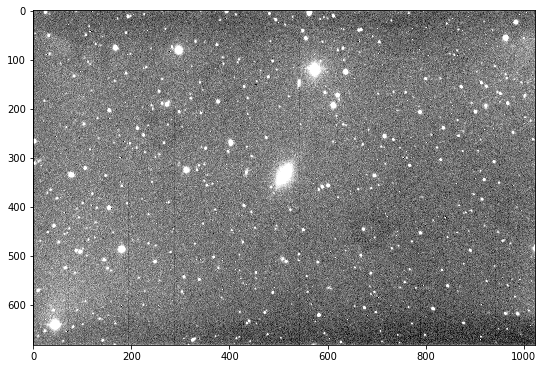

In [8]:
norm = ImageNormalize(img.pixeldata, interval=ZScaleInterval(),
                      stretch=LinearStretch())

plt.figure(figsize=(9,10))
plt.imshow(img.pixeldata, cmap='Greys_r', norm=norm)


* The mask inferred or setted

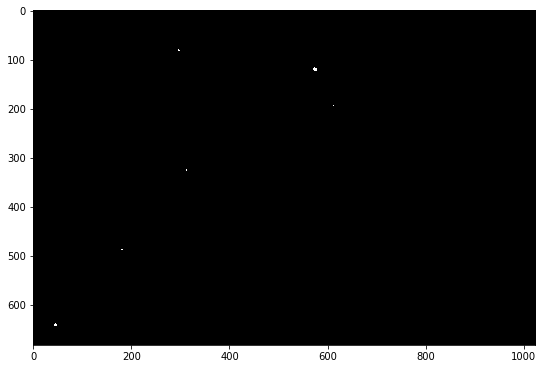

In [9]:
plt.figure(figsize=(9,10))
plt.imshow(img.mask, cmap='Greys_r')

* The background calculated

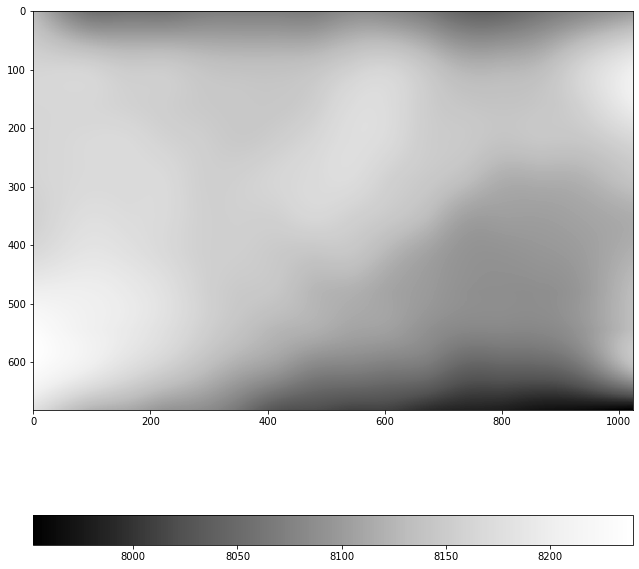

In [10]:
plt.figure(figsize=(9,10))
plt.imshow(img.background, cmap='Greys_r')
plt.colorbar(orientation='horizontal')
plt.tight_layout()

As the background is being estimated only if accesed, then it prints the results. 

* The background subtracted image

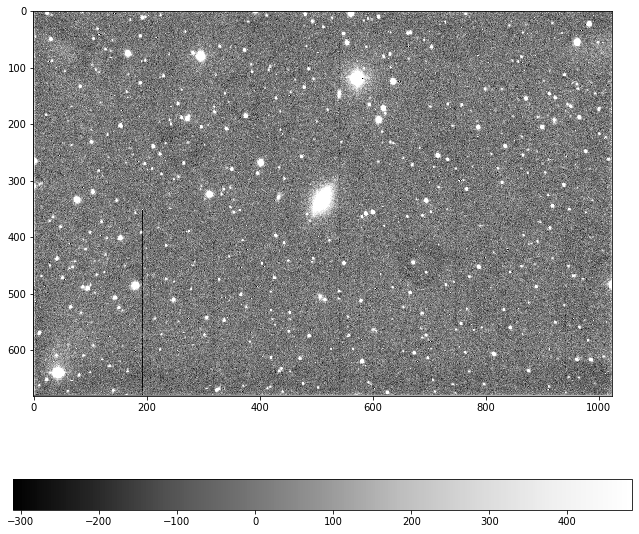

In [11]:
norm = ImageNormalize(img.bkg_sub_img, interval=ZScaleInterval(),
                      stretch=LinearStretch())
plt.figure(figsize=(9,8))
plt.imshow(img.bkg_sub_img, cmap='Greys_r', norm=norm)
plt.colorbar(orientation='horizontal')
plt.tight_layout()

* It also can be obtained a interpolated version of this image. The interpolated version is replacing masked pixels by using a box kernel convolutional interpolation:

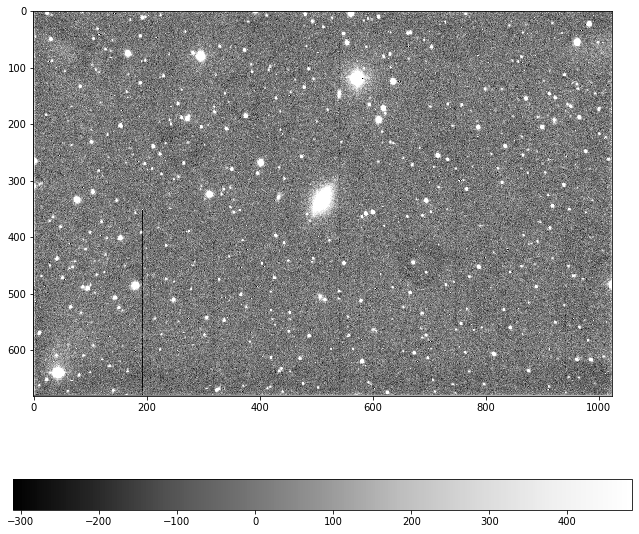

In [12]:
norm = ImageNormalize(img.bkg_sub_img, interval=ZScaleInterval(),
                      stretch=LinearStretch())
plt.figure(figsize=(9,8))
plt.imshow(img.interped, cmap='Greys_r', norm=norm)
plt.colorbar(orientation='horizontal')
plt.tight_layout()

* The stamp_shape to use (this is the final figure, after some exploring of the stars chosen)

In [13]:
print(img.stamp_shape)

(15, 15)


* Get the stamp positions is also possible

In [14]:
print(img.stamps_pos[0:10])

updating stamp shape to (21,21)
[[  4.00943632  25.26128582]
 [  7.14687073 480.9091281 ]
 [ 11.72774022 610.83903618]
 [ 12.82933202 193.25984592]
 [ 19.53525094 493.70670288]
 [ 41.5536534  548.48252542]
 [ 50.58756505  31.54122568]
 [ 64.9548974  704.69765449]
 [ 70.30182414 373.69091293]
 [ 74.9685698  282.51691292]]


* Obtaining the best sources was explained in Tutorial 01, but here we show it again just to be complete

In [15]:
print(img.best_sources[0:10][['x', 'y', 'cflux']])

[( 25.26128582,  4.00943632, 53946.68359375)
 (480.9091281 ,  7.14687073, 24435.02539062)
 (610.83903618, 11.72774022, 40931.53515625)
 (193.25984592, 12.82933202, 47999.05859375)
 (493.70670288, 19.53525094, 30155.32421875)
 (548.48252542, 41.5536534 , 48259.6953125 )
 ( 31.54122568, 50.58756505, 22010.40234375)
 (704.69765449, 64.9548974 , 18889.1796875 )
 (373.69091293, 70.30182414, 19581.19335938)
 (282.51691292, 74.9685698 , 24461.18554688)]


* We can get the final number of sources used in PSF estimation

In [16]:
print(img.n_sources)

83


* We can also print the covariance matrix from these objects

In [17]:
print(img.cov_matrix)

[[8.98632497e-05 6.09003740e-05 7.33019848e-05 ... 5.39034293e-05
  5.81182182e-05 8.01227559e-05]
 [6.09003740e-05 5.48652651e-05 5.77634347e-05 ... 4.11557684e-05
  4.41151438e-05 5.80260826e-05]
 [7.33019848e-05 5.77634347e-05 7.42518817e-05 ... 4.85060699e-05
  5.77473931e-05 7.41490342e-05]
 ...
 [5.39034293e-05 4.11557684e-05 4.85060699e-05 ... 4.26306282e-05
  3.74503378e-05 5.01497669e-05]
 [5.81182182e-05 4.41151438e-05 5.77473931e-05 ... 3.74503378e-05
  5.33649456e-05 6.24053839e-05]
 [8.01227559e-05 5.80260826e-05 7.41490342e-05 ... 5.01497669e-05
  6.24053839e-05 9.33254922e-05]]


* As showed from Tutorial 02 we can get the PSF, depending on our level of approximation needed

In [18]:
a_fields, psf_basis = img.get_variable_psf(inf_loss=0.01)

(83, 83) (441, 83)


In [19]:
print(len(psf_basis), len(a_fields))

45 45


Check the information loss argument, which states the maximum amount of information lost in the basis expansion.
If we change it the basis is updated:

In [20]:
a_fields, psf_basis = img.get_variable_psf(inf_loss=0.10)
print(len(psf_basis), len(a_fields))

(83, 83) (441, 83)
3 3


Of course the elements of the basis are unchanged, only a subset is returned. So going from small `inf_loss` to bigger values is the same as choosing less elements in the calculated basis.

Once obtained this basis and coefficient fields we can display them using some of the `plot` module functionalities:

In [21]:
from properimage.plot import plot_afields, plot_psfbasis

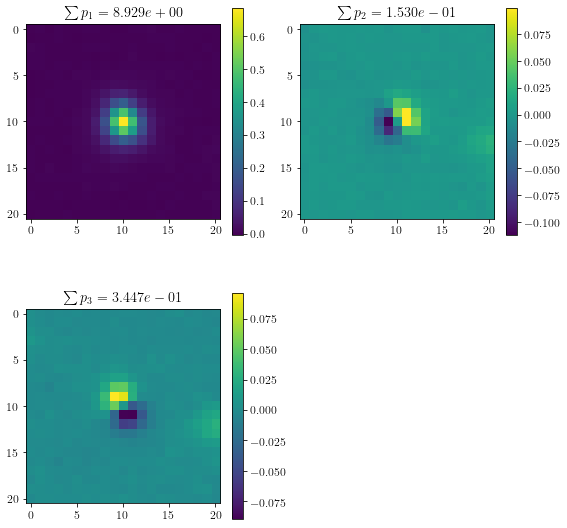

In [22]:
plot_psfbasis(psf_basis=psf_basis, nbook=True)

For the `a_fields` object we need to give the coordinates where we evaluate this coefficients.
A function is provided, inside `img` instance object.

In [23]:
x, y = img.get_afield_domain()

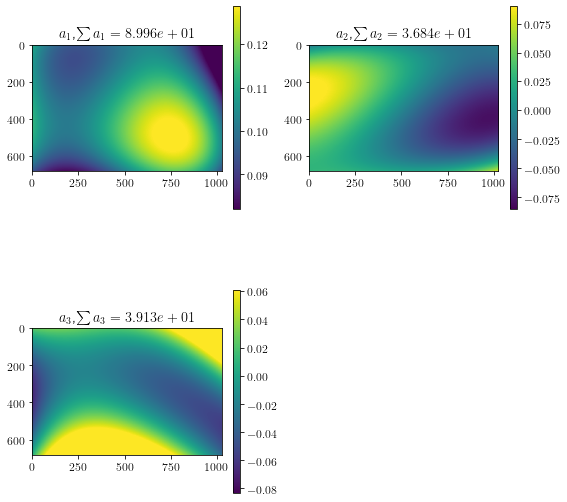

In [24]:
plot_afields(a_fields=a_fields, x=x, y=y, nbook=True)

* The instance is capable of calculating its own $S$ component (Zackay et al. 2016 notation)

In [25]:
S = img.s_component

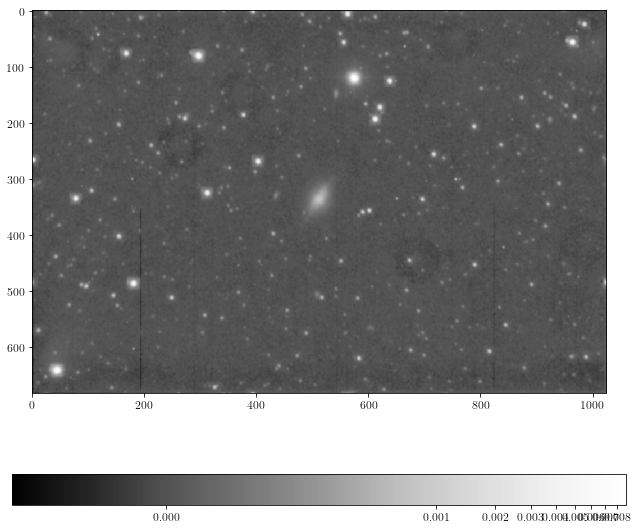

In [26]:
norm = ImageNormalize(S, interval=MinMaxInterval(),
                      stretch=LogStretch())
plt.figure(figsize=(9,8))
plt.imshow(S, cmap='Greys_r', norm=norm)
plt.colorbar(orientation='horizontal')
plt.tight_layout()

We can also attempt to place our PSF measurement on top of the stars of the image. This is done by placing a delta function in each star position, and convolving with the `autopsf`s obtained, and add them weighted with the `a(x,y)` fields.

In [30]:
a_fields, psf_basis = img.get_variable_psf(inf_loss=0.05)

(83, 83) (441, 83)


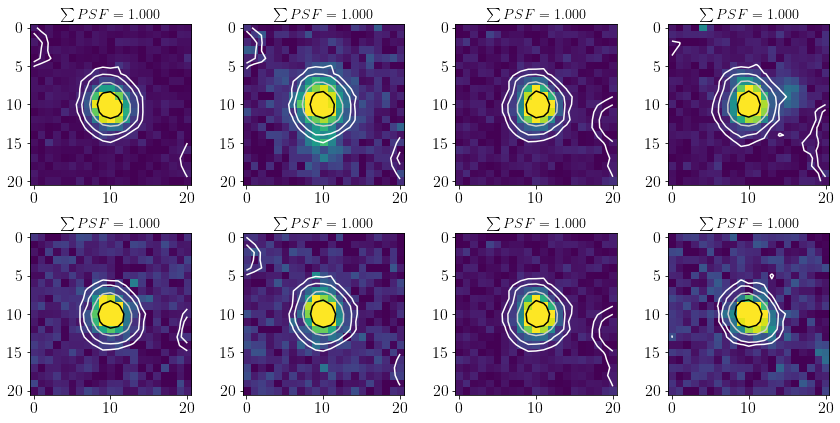

In [31]:
plt.figure(figsize=(12, 6))
for i in range(8):
    nsrc = np.random.randint(0, img.n_sources)
    xc, yc = img.best_sources[nsrc][['y', 'x']]
    try:
        patch = si.extract_array(img.pixeldata, img.stamp_shape, 
                                 [xc, yc], fill_value=img._bkg.globalrms, mode='strict')
    except:
        nsrc = np.random.randint(0, img.n_sources)
        xc, yc = img.best_sources[nsrc][['y', 'x']]  
        patch = si.extract_array(img.pixeldata, img.stamp_shape, 
                                 [xc, yc], fill_value=img._bkg.globalrms, mode='strict')
        
    plt.subplot(2, 4, i+1)
    patch = np.log10(patch)
    plt.imshow(patch, vmin=np.percentile(patch, q=10), vmax=np.percentile(patch, q=98))
    plt.tick_params(labelsize=16)
    try:
        thepsf = img.get_psf_xy(xc, yc)
    except ValueError:
        print(xc, yc)
    #print(patch.shape, thepsf.shape)
    labels = {'sum': np.sum(thepsf)}
    plt.title(r'$\sum PSF = {sum:4.3f}$'.format(**labels))
    plt.contour(thepsf, levels=[0.0015, 0.003, 0.01, 0.03], cmap='Greys')
    
plt.tight_layout()